In [60]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import math

In [27]:
filename=r'/Users/Amelia/Desktop/DAL.csv'

In [28]:
def makeDataFrame(filename):
    data=pd.read_csv(filename)
    df=pd.DataFrame(data,columns=['Adj Close'])
    print(df)
    s=df.values.tolist()
    return s 

makeDataFrame(filename)

In [67]:
K=100
S0=30
r=0.06
N=4
t=5
u=1+r+math.sqrt((1+r)**2-1)
d=1/u
K2=K*d

In [30]:
EuroChooserK1=5
EuroChooserK2=6

K2 has to be greater than K1

In [68]:
p=0.5
q=1-p

print(p,q)

In [69]:
def StockPrice():
    StockPrice={}
    StockPrice[N]=[]
    for n in range(0, N+1):
        StockPrice[N].append(S0*(u**n)*(d**(N-n)))
    for i in range(N-1, -1, -1):
        StockPrice[i]=[]
        for j in range(0, i+1):
            StockPrice[i].append((StockPrice[i+1][j+1])/u)
    return StockPrice

In [70]:
StockPriceChart=[]
columns = []
for i in range(N, -1, -1):
    chart = []
    columns.append(N-i)
    for j in range(0,i):
        chart.append("")
    for j in range(i, N+1):
        chart.append(StockPrice()[j][i])
    StockPriceChart.append(chart)
df = pd.DataFrame(StockPriceChart, columns = columns)
df.style.hide_index()

/var/folders/v2/8kmltg8j0d1glmqdfvfvmprc0000gn/T/ipykernel_59280/3866779644.py:12: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  df.style.hide_index()


0,1,2,3,4
,,,,119.104555
,,,84.377488,59.775719
,,59.775719,42.347037,30.000000
,42.347037,30.000000,21.252963,15.056281
30.000000,21.252963,15.056281,10.666352,7.556386


for i in range(0, N+1):
    for j in range(i,-1,-1):
        print(StockPrice[i][j])
    print("\n")

In [34]:
def IntrinsicPut():
    IntrinsicPut={}
    for i in range(N, -1, -1):
        IntrinsicPut[i]=[]
        for j in range(0, i+1):
            IntrinsicPut[i].append(max(0,K-StockPrice()[i][j]))
    return IntrinsicPut

In [35]:
def IntrinsicPutK():
    IntrinsicPutK={}
    for i in range(N, -1, -1):
        k=2.71828183**(-r*(N-i))*K
        IntrinsicPutK[i]=[]
        for j in range(0, i+1):
            IntrinsicPutK[i].append(max(0,k-StockPrice()[i][j]))
    return IntrinsicPutK

In [36]:
IntrPutChart=[]
columns = []
for i in range(N, -1, -1):
    chart = []
    columns.append(N-i)
    for j in range(0,i):
        chart.append("")
    for j in range(i, N+1):
        chart.append(IntrinsicPut()[j][i])
    IntrPutChart.append(chart)
df = pd.DataFrame(IntrPutChart, columns = columns)
df.style.hide_index()

/var/folders/v2/8kmltg8j0d1glmqdfvfvmprc0000gn/T/ipykernel_59280/2461809975.py:12: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  df.style.hide_index()


0,1,2,3,4,5,6,7,8,9,10
,,,,,,,,,,0.000000
,,,,,,,,,0,0.000000
,,,,,,,,0,0,0.000000
,,,,,,,0,0,0,0.000000
,,,,,,0,0,0,0,0.000000
,,,,,0,0,0,0,0,0.000000
,,,,0,0,0,0,0,0,0.000000
,,,0,0,0,0,0,0,0,0.000000
,,0,0,0,0,0,0,0,0,0.000000
,0,0,0,0,0,4.592477,10.316928,15.697913,20.756038,25.510676


for i in range(0, N+1):
    for j in range(i,-1,-1):
        print(IntrinsicPut[i][j])
    print("\n")

In [48]:
def IntrinsicCall():
    IntrinsicCall={}
    SP = StockPrice()
    for i in range(N, -1, -1):
        IntrinsicCall[i]=[]
        for j in range(0, i+1):
            IntrinsicCall[i].append(max(0,SP[i][j]-K))
    return IntrinsicCall

In [50]:
IntrCallChart=[]
columns = []
IC = IntrinsicCall()
for i in range(N, -1, -1):
    chart = []
    columns.append(N-i)
    for j in range(0,i):
        chart.append("")
    for j in range(i, N+1):
        chart.append(IC[j][i])
    IntrCallChart.append(chart)
df = pd.DataFrame(IntrCallChart, columns = columns)
df.style.hide_index()

/var/folders/v2/8kmltg8j0d1glmqdfvfvmprc0000gn/T/ipykernel_59280/818106529.py:13: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  df.style.hide_index()


0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,100351722596.255264
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,77193632743.273285,72562014772.676880
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,59379717471.748680,55816934417.443748,52467918346.397125
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,45676705724.422058,42936103374.956726,40359937166.459328,37938340930.471764
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,35135927457.247734,33027771803.812866,31046105489.584099,29183339154.209049,27432338798.956501
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,27027636482.498257,25405978287.548359,23881619584.295460,22448722403.237728,21101799053.043461,19835691103.860851
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,20790489578.844810,19543060198.114120,18370476580.227276,17268247979.413635,16232153094.648815,15258223902.969885,14342730462.791695
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,15992684268.342161,15033123206.241631,14131135807.867134,13283267653.395103,12486271588.191397,11737095286.899912,11032869563.685919,10370897383.864763
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,12302064798.724739,11563940904.801254,10870104444.513180,10217898171.842386,9604824275.531843,9028534812.999931,8486822718.219937,7977613349.126740,7498956542.179135
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,9463126745.172876,8895339134.462503,8361618780.394753,7859921647.571066,7388326342.716803,6945026756.153793,6528325144.784567,6136625630.097492,5768428086.291642,5422322395.114144


for i in range(0, N+1):
    for j in range(i,-1,-1):
        print(IntrinsicCall[i][j])
    print("\n")

In [72]:
def exp(x,y,p,q,r):
    return (x*p+y*q)/(1+r)

def rnExp(x,y):
    return exp(x,y,p,q,r)

In [74]:
def vanillaBond():
    vanillaBond={}
    vanillaBond[N]=[50 for i in range(N+1)]
    #IP=IntrinsicPut()
    #for n in range(0, N+1):
    #    PutPriceA[N].append(IP[N][n])
    for i in range(N-1, -1, -1):
        vanillaBond[i]=[]
        for j in range(i+1):
            vanillaBond[i].append(rnExp(vanillaBond[i+1][j+1],vanillaBond[i+1][j]))
    return PutPriceA

In [53]:
def PutPriceAK():
    PutPriceAK={}
    PutPriceAK[N]=[]
    for n in range(0, N+1):
        PutPriceAK[N].append(IntrinsicPutK()[N][n])
    for i in range(N-1, -1, -1):
        PutPriceAK[i]=[]
        for j in range(0, i+1):
            PutPriceAK[i].append(max(IntrinsicPutK()[i][j],exp(PutPriceAK[i+1][j+1],PutPriceAK[i+1][j],p,q,r)))
    return PutPriceAK

<Axes: >

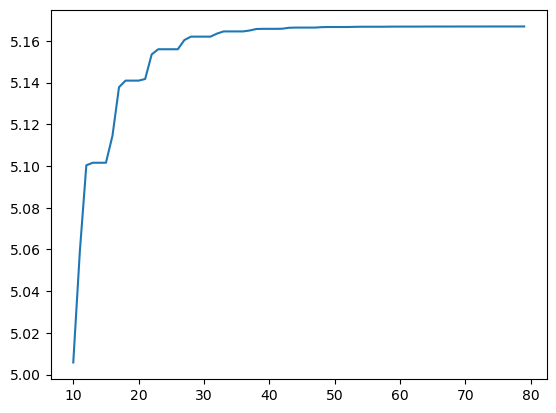

In [56]:
PutPriceATChart=[]
columns=[]
for x in range(10,80):
    N=x
    columns.append(x)
    PutPriceATChart.append(PutPriceA()[0][0])
df = pd.Series(PutPriceATChart, index = columns)
df.plot.line()

PutPriceAChart=[]
columns = []
for i in range(N, -1, -1):
    chart = []
    columns.append(N-i)
    for j in range(0,i):
        chart.append("")
    for j in range(i, N+1):
        chart.append(PutPriceA()[j][i])
    PutPriceAChart.append(chart)
df = pd.DataFrame(PutPriceAChart, columns = columns)
df.style.hide_index()

PutPriceAKChart=[]
columns = []
for i in range(N, -1, -1):
    chart = []
    columns.append(N-i)
    for j in range(0,i):
        chart.append("")
    for j in range(i, N+1):
        chart.append(PutPriceAK[j][i])
    PutPriceAKChart.append(chart)
df = pd.DataFrame(PutPriceAKChart, columns = columns)
df.style.hide_index()

for i in range(0, N+1):
    for j in range(i,-1,-1):
        print(PutPriceA[i][j])
    print("\n")

In [57]:
def CallPriceA():
    CallPriceA={}
    CallPriceA[N]=[]
    IC = IntrinsicCall()
    for n in range(0, N+1):
        CallPriceA[N].append(IC[N][n])
    for i in range(N-1, -1, -1):
        CallPriceA[i]=[]
        for j in range(0, i+1):
            CallPriceA[i].append(max(IC[i][j],exp(CallPriceA[i+1][j+1],CallPriceA[i+1][j],p,q,r)))
    return CallPriceA

In [58]:
CallPriceAChart=[]
columns = []
CPA = CallPriceA()
for i in range(N, -1, -1):
    chart = []
    columns.append(N-i)
    for j in range(0,i):
        chart.append("")
    for j in range(i, N+1):
        chart.append(CPA[j][i])
    CallPriceAChart.append(chart)
df = pd.DataFrame(CallPriceAChart, columns = columns)
df.style.hide_index()

/var/folders/v2/8kmltg8j0d1glmqdfvfvmprc0000gn/T/ipykernel_59280/3391098403.py:13: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  df.style.hide_index()


0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,100351722596.255264
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,77193632748.933670,72562014772.676880
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,59379717482.749046,55816934423.104134,52467918346.397125
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,45676705740.460144,42936103385.957092,40359937172.119698,37938340930.471764
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,35135927478.038383,33027771819.850948,31046105500.584454,29183339159.869427,27432338798.956501
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,27027636507.772453,25405978308.339001,23881619600.333534,22448722414.238083,21101799058.703838,19835691103.860851
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,20790489608.348766,19543060223.388306,18370476601.017906,17268247995.451706,16232153105.649174,15258223908.630266,14342730462.791695
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,15992684301.836456,15033123235.745579,14131135833.141315,13283267674.185738,12486271604.229471,11737095297.900270,11032869569.346296,10370897383.864763
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,12302064835.983505,11563940938.295544,10870104474.017126,10217898197.116573,9604824296.322481,9028534829.038008,8486822729.220295,7977613354.787118,7498956542.179135
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,9463126785.983030,8895339171.721268,8361618813.889044,7859921677.075016,7388326367.990988,6945026776.944430,6528325160.822639,6136625641.097850,5768428091.952021,5422322395.114144


for i in range(0, N+1):
    for j in range(i,-1,-1):
        print(CallPriceA[i][j])
    print("\n")

In [ ]:
def chooserA():
    CA={}
    CA[t]=[]
    CPA=CallPriceA()
    PPA=PutPriceA()
    for i in range(0,t+1):
        CA[t].append(max(CPA[t][i],PPA[t][i]))
    for j in range(t-1,-1,-1):
        CA[j]=[]
        for k in range(0,j+1):
            CA[j].append(exp(CA[j+1][k+1],CA[j+1][k],p,q,r))
    return CA

In [45]:
ChooserAChart=[]
columns = []
CA=chooserA()
for i in range(t, -1, -1):
    chart = []
    columns.append(t-i)
    for j in range(0,i):
        chart.append("")
    for j in range(i, t+1):
        chart.append(CA[j][i])
    ChooserAChart.append(chart)
df = pd.DataFrame(ChooserAChart, columns = columns)
df.style.hide_index()

NameError: name 'chooserA' is not defined

for i in range(0, t+1):
    for j in range(i,-1,-1):
        print(chooserA[i][j])
    print("\n")

In [ ]:
def CallPriceE():
    CallPriceE={}
    CallPriceE[N]=[]
    for n in range(0, N+1):
        CallPriceE[N].append(IntrinsicCall()[N][n])
    for i in range(N-1, -1, -1):
        CallPriceE[i]=[]
        for j in range(0, i+1):
            CallPriceE[i].append(max(IntrinsicCall()[i][j],exp(CallPriceE[i+1][j+1],CallPriceE[i+1][j],p,q,r)))
    return CallPriceE

for i in range(0, N+1):
    for j in range(i,-1,-1):
        print(CallPriceE[i][j])
    print("\n")

In [ ]:
def PutPriceE():
    PutPriceE={}
    PutPriceE[N]=[]
    for n in range(0, N+1):
        PutPriceE[N].append(IntrinsicPut()[N][n])
    for i in range(N-1, -1, -1):
        PutPriceE[i]=[]
        for j in range(0, i+1):
            PutPriceE[i].append(exp(PutPriceE[i+1][j+1],PutPriceE[i+1][j],p,q,r))
    return PutPriceE

In [ ]:
def PutPriceEK():
    PutPriceEK={}
    PutPriceEK[N]=[]
    IntrinsicPut=IntrinsicPutK()
    PutPriceEK=PutPriceEK()
    for n in range(0, N+1):
        PutPriceEK[N].append(IntrinsicPutK[N][n])
    for i in range(N-1, -1, -1):
        PutPriceEK[i]=[]
        for j in range(0, i+1):
            PutPriceEK[i].append(exp(PutPriceEK[i+1][j+1],PutPriceEK[i+1][j],p,q,r))
    return PutPriceEK

PutPriceEKChart=[]
columns = []
for i in range(N, -1, -1):
    chart = []
    columns.append(N-i)
    for j in range(0,i):
        chart.append("")
    for j in range(i, N+1):
        chart.append(PutPriceEK[j][i])
    PutPriceEKChart.append(chart)
df = pd.DataFrame(PutPriceEKChart, columns = columns)
df.style.hide_index()

for i in range(0, N+1):
    for j in range(i,-1,-1):
        print(PutPriceE[i][j])
    print("\n")

In [ ]:
straddleED={}
straddleED[N]=[]
CPE=CallPriceE()
PPE=PutPriceE()
for i in range(0,N+1):
    straddleED[N].append(max(CPE[N][i],PPE[N][i]))
for j in range(N-1,-1,-1):
    straddleED[j]=[]
    for k in range(0,j+1):
        straddleED[j].append(exp(straddleED[j+1][k+1],straddleED[j+1][k],p,q,r))

for i in range(0, N+1):
    for j in range(i,-1,-1):
        print(straddleED[i][j])
    print("\n")

In [ ]:
def ChooserE():
    chooserE={}
    chooserE[t]=[]
    CPE=CallPriceE()
    PPE=PutPriceE()
    for i in range(0,t+1):
        chooserE[t].append(max(CPE[t][i],PPE[t][i]))
    for j in range(t-1,-1,-1):
        chooserE[j]=[]
        for k in range(0,j+1):
            chooserE[j].append(exp(chooserE[j+1][k+1],chooserE[j+1][k],p,q,r))
    return chooserE

for i in range(0, t+1):
    for j in range(i,-1,-1):
        print(ChooserE()[i][j])
    print("\n")

In [ ]:
KhatEP=(1+r)**(t-N)*K
NewEP={}
NewEP[t]=[]
SP=StockPrice()
for i in range(0,t+1):
    NewEP[t].append(max(0,KhatEP-SP[t][i]))
for j in range(t-1,-1,-1):
    NewEP[j]=[]
    for k in range(0,j+1):
        NewEP[j].append(exp(NewEP[j+1][k+1],NewEP[j+1][k],p,q,r))

for i in range(0, t+1):
    for j in range(i,-1,-1):
        print(NewEP[i][j])
    print("\n")

In [ ]:
BerCallIntri={}
SP=StockPrice()
for i in range(0,N+1):
    BerCallIntri[i]=[]
    for j in range(0,i+1):
        BerCallIntri[i].append(max(0,SP[i][j]-K))

for i in range(0, N):
    for j in range(i,-1,-1):
        print(BerCallIntri[i][j])
    print("\n")

In [ ]:
BerCallPrice={}
BerCallPrice[N]=[]
for n in range(0, N+1):
    BerCallPrice[N].append(BerCallIntri[N][n])
for i in range(N-1, -1, -1):
    BerCallPrice[i]=[]
    for j in range(0, i+1):
        BerCallPrice[i].append(max(BerCallIntri[i][j],exp(BerCallPrice[i+1][j+1],BerCallPrice[i+1][j],p,q,r)))

for i in range(0, N+1):
    for j in range(i,-1,-1):
        print(BerCallPrice[i][j])
    print("\n")

In [ ]:
ChooserK1E=[]
for i in range(0,EuroChooserK1+1):
    ChooserK1E.append(max(CallPriceE[EuroChooserK1][i],PutPriceE[EuroChooserK1][i]))

TypeError: 'function' object is not subscriptable

In [ ]:
ChooserK2E=[]
for i in range(0,EuroChooserK2+1):
    ChooserK2E.append(max(CallPriceE[EuroChooserK2][i],PutPriceE[EuroChooserK2][i]))

TypeError: 'function' object is not subscriptable

In [ ]:
BermudanE={}
BermudanE[EuroChooserK2]=[]
for i in range(0,EuroChooserK2+1):
    BermudanE[EuroChooserK2].append(ChooserK2E[i])
BermudanE[EuroChooserK1]=[]
for j in range(0,EuroChooserK1+1):
    BermudanE[EuroChooserK1].append(max(ChooserK1E[j],exp(BermudanE[EuroChooserK2][j+1],BermudanE[EuroChooserK2][j],p,q,r)))
for k in range(EuroChooserK1-1, -1, -1):
    BermudanE[k]=[]
    for m in range(0, k+1):
        BermudanE[k].append(exp(BermudanE[k+1][m+1],BermudanE[k+1][m],p,q,r))

IndexError: list index out of range

for i in range(0,EuroChooserK2):
    for j in range(i,-1,-1):
        print(BermudanE[i][j])
    print("\n")

In [ ]:
BermudanA={}
BermudanA[EuroChooserK2]=[]
for i in range(0,EuroChooserK2+1):
    BermudanA[EuroChooserK2].append(max(PutPriceA[EuroChooserK2][i],CallPriceA[EuroChooserK2][i]))
BermudanA[EuroChooserK1]=[]
for k in range(0,EuroChooserK1+1):
    BermudanA[EuroChooserK1].append(max(chooserA[EuroChooserK1][k],exp(BermudanA[EuroChooserK1+1][k+1],BermudanA[EuroChooserK1+1][k],p,q,r)))
for j in range(EuroChooserK1-1, -1, -1):
    BermudanA[j]=[]
    for m in range(0, j+1):
        BermudanA[j].append(exp(BermudanA[j+1][m+1],BermudanA[j+1][m],p,q,r))

TypeError: 'function' object is not subscriptable

for i in range(0,EuroChooserK2):
    for j in range(i,-1,-1):
        print(BermudanA[i][j])
    print("\n")

def BS():
    
    return exp(-r*N)*K*

In [ ]:
def StockRatio(a,b):
    return np.log(b/a)

In [ ]:
def AnualV():
    StockList = makeDataFrame(filename)
    count=len(StockList)
    RatioSum=0
    for i in range(1,count):
        ratio=StockRatio(StockList[i-1][0],StockList[i][0])
        RatioSum+=ratio
    Ud=RatioSum/count
    squareSum=0
    for i in range(1,count):
        ratio2=StockRatio(StockList[i-1][0],StockList[i][0])
        squareSum+=(ratio2-Ud)**2
    Md=(squareSum/count)**(1/2)
    Mh=Md*(252)**(1/2)
    return Mh

In [ ]:
AnualV()

     Adj Close
0    40.680000
1    41.349998
2    40.060001
3    38.560001
4    40.660000
..         ...
248  29.719999
249  29.290001
250  31.090000
251  29.700001
252  29.924999

[253 rows x 1 columns]


0.4725272137730581